# Review of classical electronic structure methods 

In order to assess the performance of quantum computing algorithms in addressing the electronic structure problem, we will briefly review a few commonly employed classical electronic structure methods of varying level of approximation. 

## Hartree-Fock

The Hartree-Fock (HF) method employs a **mean-field approximation**, where Coulomb correlation of electrons is neglected. The HF wavefunction is hence restricted to the form of a single Slater determinant, for which the optimal form may be acquired by an optimization of the underlying single particle basis (orbitals). Once the optimal HF orbitals have been found, the HF state may be written as 

$$ | \text{HF} \rangle = \prod_{p \in \text{occ}} \hat a^\dagger_p | \text{vac} \rangle $$

where $\hat a^\dagger_p$ creates an electron in the $p^{\rm{th}}$ optimized HF spin orbital, and  $| \text{vac} \rangle$ is the vacuum state (all spin-orbitals unoccupied). Due to the restriction to a single Slater determinant, the HF energy may be obtained very efficiently and can be applied to very large molecules, however it becomes qualitatively incorrect when **electronic correlations** become sufficiently strong. The HF wavefunction is often used as a starting point in more accurate treatments of electronic correlation. 

## Coupled cluster

The Coupled cluster (CC) method introduces electronic correlation to the wavefunction ansatz by operating on the HF reference state with the exponential of excitation operators

$$|\text{CC} \rangle = e^{\hat T} | \text{HF}\rangle, \quad \hat T = \hat T_1 + \hat T_2 + ...$$

where $\hat T_1 = \sum_{ia} t^{a}_i \hat a^\dagger_a \hat a_i$ are referred to as 'singles', $\hat T_2 = \sum_{ijab} t^{ab}_{ij} \hat a^\dagger_a \hat a^\dagger_b \hat a_i \hat a_j$ as 'doubles', etc. When the excitation rank is truncated to only singles (S) and doubles (D), $\hat T = \hat T_1 + \hat T_2$, the corresponding ansatz is referred to as CCSD. Since the number of possible single and double excitations for a system of $N$ electrons in $M$ orbitals is polynomial in $M$, one can efficiently solve a system of equations to obtain the optimized CCSD amplitudes. CCSD often gives accurate energies and can be applied to modestly sized chemical systems. However, due to its implementation, it can **violate the variational principle** and give energies lower than the ground state.

## Full Configuration Interaction
The full configuration interaction (FCI) method yields the **exact ground state energy** within a given basis set. The FCI wavefunction is written as a linear combination of all possible $N$-particle Slater determinants over the orbital basis
$$|\text{FCI} \rangle =  \left( \sum_{ia} C^{a}_i \hat a^\dagger_a \hat a_i + \sum_{ijab} C^{ab}_{ij} \hat a^\dagger_a \hat a^\dagger_b \hat a_i \hat a_j + ...  \right) | \text{HF} \rangle $$
where the sum includes up to $N$-electron excitations, and hence there are an exponential number of coefficients to optimize in $| \text{FCI} \rangle$. Due to its **exponential complexity**, FCI is often reserved for only the smallest chemical systems. However, it serves as a useful result to compare to when assessing tractable electronic structure methods.

# Benchmarking for electronic PESs in minimal basis (STO-3G)

We will apply HF, CCSD, and FCI to obtaining the PESs for a few molecular dissociation processes in minimal (STO-3G) basis.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utility import get_molecular_data, obtain_PES

basis = 'sto-3g'

## LiH

In [8]:
bond_lengths = np.linspace(0.2,4,20)

In [9]:
#Run FCI
FCI_PES = obtain_PES('lih', bond_lengths, basis, method='fci')

E = -4.041729928511242 Eh
E = -6.640277836959335 Eh
E = -7.319318938170509 Eh
E = -7.6341673297283545 Eh
E = -7.7844602802670355 Eh
E = -7.852430853316397 Eh
E = -7.878453652319028 Eh
E = -7.882324378871247 Eh
E = -7.874524024942916 Eh
E = -7.861087772411124 Eh
E = -7.845683623116459 Eh
E = -7.830631624342856 Eh
E = -7.81739992737568 Eh
E = -7.806763402503797 Eh
E = -7.798843159455255 Eh
E = -7.7932743006258995 Eh
E = -7.789498785374036 Eh
E = -7.78699181536836 Eh
E = -7.78534742409718 Eh
E = -7.784278178707712 Eh


In [10]:
#Run HF
HF_PES = obtain_PES('lih', bond_lengths, basis,  method='hf')

E = -3.9999380818492325 Eh
E = -6.610321463567768 Eh
E = -7.299610442693176 Eh
E = -7.615847732045089 Eh
E = -7.767438446509358 Eh
E = -7.835694662390273 Eh
E = -7.860621315054134 Eh
E = -7.861950402903117 Eh
E = -7.850107259191477 Eh
E = -7.830998803612704 Eh
E = -7.8080941129824355 Eh
E = -7.783488814132525 Eh
E = -7.758519166159397 Eh
E = -7.734113419610024 Eh
E = -7.710958961728219 Eh
E = -7.689552215347494 Eh
E = -7.67020278785301 Eh
E = -7.653043174613131 Eh
E = -7.6380593865630875 Eh
E = -7.62513360209604 Eh


In [13]:
#Run CCSD
CCSD_PES = obtain_PES('lih', bond_lengths, basis,  method='ccsd')

E = -4.041752525992549 Eh
E = -6.64012791342513 Eh
E = -7.319305680298506 Eh
E = -7.634165017666916 Eh
E = -7.78445587762448 Eh
E = -7.852424340525681 Eh
E = -7.878444465245865 Eh
E = -7.882312029331984 Eh
E = -7.874508656921257 Eh
E = -7.861068913177801 Eh
E = -7.845659505841004 Eh
E = -7.830599081192249 Eh
E = -7.817354761025986 Eh
E = -7.806701896330062 Eh
E = -7.798763940605923 Eh
E = -7.793178638504528 Eh
E = -7.789389163278143 Eh
E = -7.786870785551713 Eh
E = -7.78521728873102 Eh
E = -7.784141040410271 Eh


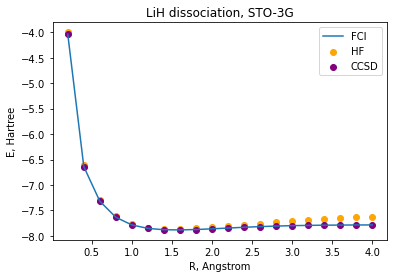

In [14]:
#Plot LiH PESs

plt.title('LiH dissociation, STO-3G')
plt.xlabel('R, Angstrom')
plt.ylabel('E, Hartree')

plt.plot(bond_lengths, FCI_PES, label='FCI')
plt.scatter(bond_lengths, HF_PES, label='HF', color='orange')
plt.scatter(bond_lengths, CCSD_PES, label='CCSD', color='purple')
plt.legend()

<img src="figs/testimage.png">

## H4

In [2]:
angles = np.linspace(85,95,20)

In [3]:
#Run FCI
FCI_PES = obtain_PES('h4',angles, basis, method='fci')

E = -1.9867261151116775 Eh
E = -1.9836021291538697 Eh
E = -1.9807096913449946 Eh
E = -1.9780792809512464 Eh
E = -1.9757427204815055 Eh
E = -1.9737321375752095 Eh
E = -1.972078551798698 Eh
E = -1.9708101420071973 Eh
E = -1.9699503447387263 Eh
E = -1.9695160264879354 Eh
E = -1.9695160264879443 Eh
E = -1.9699503447387299 Eh
E = -1.9708101420072053 Eh
E = -1.9720785517987012 Eh
E = -1.9737321375752077 Eh
E = -1.9757427204815081 Eh
E = -1.9780792809512553 Eh
E = -1.9807096913449977 Eh
E = -1.9836021291538706 Eh
E = -1.9867261151116797 Eh


In [4]:
#Run HF
HF_PES = obtain_PES('h4', angles, basis,  method='hf')

E = -1.8473793344555705 Eh
E = -1.8404446448129468 Eh
E = -1.8334610598035739 Eh
E = -1.8264279717396827 Eh
E = -1.819344726759492 Eh
E = -1.8122106239502536 Eh
E = -1.8050249155575262 Eh
E = -1.7977868065519866 Eh
E = -1.7904954543393976 Eh
E = -1.7831499682037542 Eh
E = -1.7831499682037997 Eh
E = -1.7904954543393927 Eh
E = -1.797786806552067 Eh
E = -1.8050249155574445 Eh
E = -1.8122106239503086 Eh
E = -1.8193447267594856 Eh
E = -1.8264279717396572 Eh
E = -1.8334610598035197 Eh
E = -1.8404446448128509 Eh
E = -1.8473793344554148 Eh


In [5]:
#Run CCSD
CCSD_PES = obtain_PES('h4', angles, basis,  method='ccsd')

E = -1.9881001465424508 Eh
E = -1.9852604925342199 Eh
E = -1.982707145484162 Eh
E = -1.980478490945881 Eh
E = -1.9786138850926085 Eh
E = -1.9771517690577136 Eh
E = -1.9761272916552521 Eh
E = -1.9755695775641833 Eh
E = -1.9754990583224044 Eh
E = -1.9759252894092847 Eh
E = -1.975925289409284 Eh
E = -1.9754990583224061 Eh
E = -1.9755695775641802 Eh
E = -1.976127291655242 Eh
E = -1.977151769057704 Eh
E = -1.9786138850926045 Eh
E = -1.9804784909458748 Eh
E = -1.9827071454841694 Eh
E = -1.9852604925342086 Eh
E = -1.9881001465424373 Eh


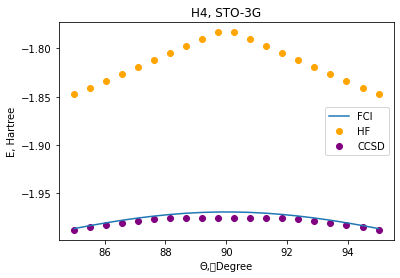

In [7]:
#Plot H2O PESs

plt.title('H4, STO-3G')
plt.xlabel('Θ,　Degree')
plt.ylabel('E, Hartree')

plt.plot(angles, FCI_PES, label='FCI')
plt.scatter(angles, HF_PES, label='HF', color='orange')
plt.scatter(angles, CCSD_PES, label='CCSD', color='purple')
plt.legend()

## NH3

In [17]:
bond_lengths = np.linspace(0.2,3,20)

In [18]:
#Run FCI
FCI_PES = obtain_PES('nh3', bond_lengths, basis, method='fci')

E = -28.858731030238786 Eh
E = -46.594121196852356 Eh
E = -52.327101502875436 Eh
E = -54.43158888762926 Eh
E = -55.21845296154213 Eh
E = -55.48027188913203 Eh
E = -55.52266453052647 Eh
E = -55.47407786846922 Eh
E = -55.39526255459267 Eh
E = -55.31591143498541 Eh
E = -55.24867851224395 Eh
E = -55.197932983716456 Eh
E = -55.16398529205976 Eh
E = -55.14382546525859 Eh
E = -55.13271865371016 Eh
E = -55.12668490649913 Eh
E = -55.12333094344392 Eh
E = -55.121410624613304 Eh
E = -55.12028987840772 Eh
E = -55.119632638656206 Eh


In [19]:
#Run HF
HF_PES = obtain_PES('nh3', bond_lengths, basis,  method='hf')

E = -28.84784688091594 Eh
E = -46.580205324488844 Eh
E = -52.30829500357518 Eh
E = -54.40403420006525 Eh
E = -55.17922453534425 Eh
E = -55.425469513720955 Eh
E = -55.44656344064386 Eh
E = -55.368453614489624 Eh
E = -55.249169754646985 Eh
E = -55.11672687361364 Eh
E = -54.98421192004705 Eh
E = -54.85807477177392 Eh
E = -54.74228608823517 Eh
E = -54.64061605809893 Eh
E = -54.54182680336909 Eh
E = -54.4640371611528 Eh
E = -54.39704390738688 Eh
E = -54.34033666678507 Eh
E = -54.292780542854764 Eh
E = -54.25317596090521 Eh


In [20]:
#Run CCSD
CCSD_PES = obtain_PES('h4', angles, basis,  method='ccsd')

E = -1.98810014654245 Eh
E = -1.9852604925342199 Eh
E = -1.9827071454841643 Eh
E = -1.9804784909458701 Eh
E = -1.9786138850926085 Eh
E = -1.9771517690577136 Eh
E = -1.976127291655256 Eh
E = -1.9755695775641995 Eh
E = -1.9754990583224044 Eh
E = -1.9759252894092847 Eh
E = -1.975925289409284 Eh
E = -1.975499058322408 Eh
E = -1.9755695775642026 Eh
E = -1.976127291655242 Eh
E = -1.977151769057704 Eh
E = -1.978613885092597 Eh
E = -1.9804784909458748 Eh
E = -1.9827071454841694 Eh
E = -1.9852604925342086 Eh
E = -1.9881001465424373 Eh


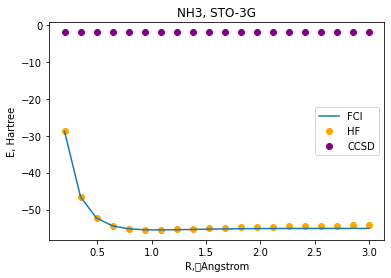

In [21]:
#Plot NH3 PESs

plt.title('NH3, STO-3G')
plt.xlabel('R,　Angstrom')
plt.ylabel('E, Hartree')

plt.plot(bond_lengths, FCI_PES, label='FCI')
plt.scatter(bond_lengths, HF_PES, label='HF', color='orange')
plt.scatter(bond_lengths, CCSD_PES, label='CCSD', color='purple')
plt.legend()